In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [56]:
df = pd.read_csv(r'D:\사용자\USER\Desktop\데이터\유사도\유사도3.csv', encoding='cp949')
df = df.drop(columns=['구군'], axis=1)

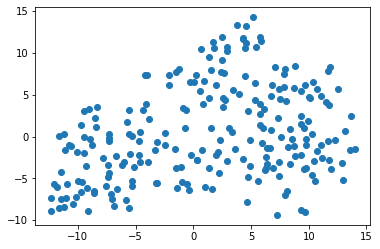

In [57]:
tsne = TSNE(n_components=2,random_state=0,learning_rate=200,init='pca',perplexity=30,metric="euclidean",early_exaggeration=30
#early_exaggeration=30이 높음
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'])
plt.show()

In [58]:
feature=pd.DataFrame(
    {"t1":tsne_results['tsne1'],
     "t2":tsne_results['tsne2']}
     )

#정규화
data=tsne_results['tsne1']
std_data = (data - np.mean(data,axis = 0))/ np.std(data,axis = 0)
normalization=(std_data-min(std_data))/(max(std_data)-min(std_data))
feature['t1']=normalization

data=tsne_results['tsne2']
std_data = (data - np.mean(data,axis = 0))/ np.std(data,axis = 0)
normalization=(std_data-min(std_data))/(max(std_data)-min(std_data))
feature['t2']=normalization


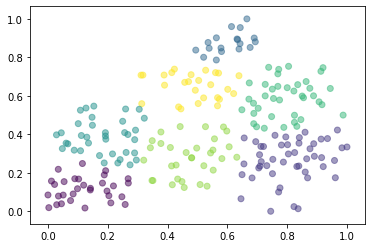

In [59]:
model = KMeans(n_clusters=7,init = 'k-means++', n_init = 10, max_iter = 300,random_state=10) #,algorithm='auto' 
#random_state 5가 최대 0.4059880543975222
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
r = pd.concat([feature,predict],axis=1)
plt.scatter(r['t1'],r['t2'],c=r['predict'],alpha=0.5)

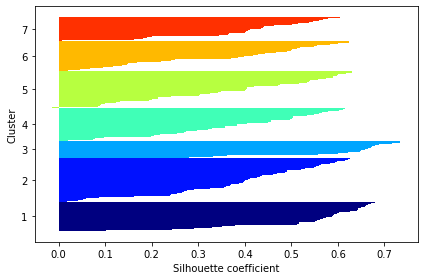

In [60]:
from sklearn.metrics import silhouette_samples
# sklearn의 metrics 모델 안에 silhouette_samples함수로 계산
# k-means++ 알고리즘 
#km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0) 

km=model
X=feature
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] 
# 실루엣 분석
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean') 
# 시각화 
y_ax_lower, y_ax_upper = 0, 0
yticks = [] 
for i, c in enumerate(cluster_labels) :
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals)
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout() 
plt.show()

In [61]:
silhouette_avg

0.41460767

In [54]:
feature2=pd.DataFrame(
    {"t1":tsne_results['tsne1'],
     "t2":tsne_results['tsne2'],
     "c":y_km,
    }
     )
feature2

,t1,t2,c
0,9.308945,-8.774128,1
1,5.161506,14.255173,2
2,4.343545,11.705733,2
3,4.294912,11.793058,2
4,2.879205,10.686411,2
...,...,...,...
224,-10.053067,-1.848506,3
225,2.194741,-4.299063,5
226,-12.291275,-8.897987,0
227,0.293062,-2.784696,5


In [62]:
feature2.to_excel('D:\사용자\\USER\\Desktop\\데이터\\유사도\\유클리드.xlsx', index=False)